In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

%matplotlib inline

In [79]:
cols = ['trees', 'weeds', 'grass']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthdays = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
monthstartdays = [1]
for d in monthdays[:-1]:
    monthstartdays.append(monthstartdays[-1] + d)

In [65]:
df = pd.read_csv('data.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df = df[~((df.index.month == 2) & (df.index.day > 28))]

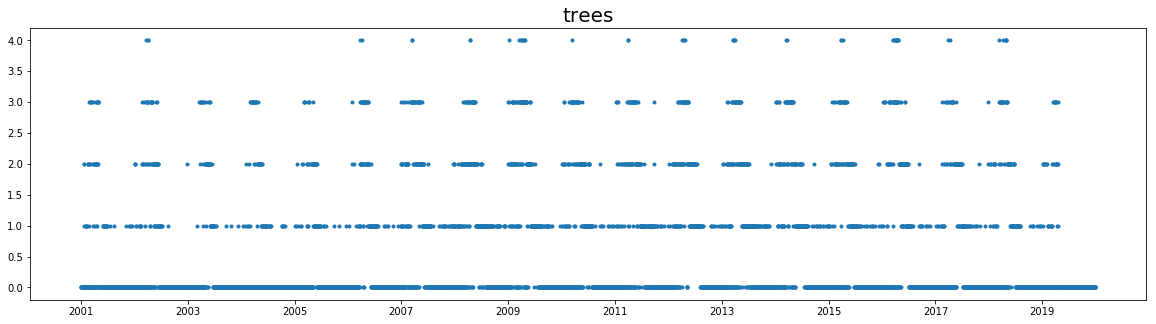

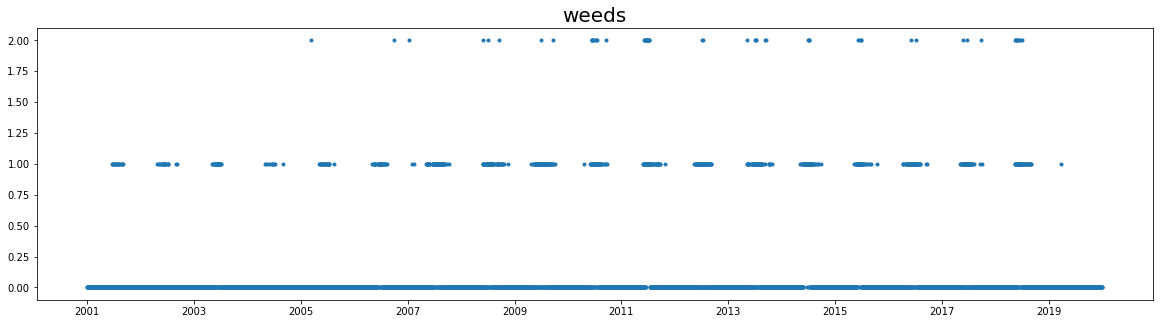

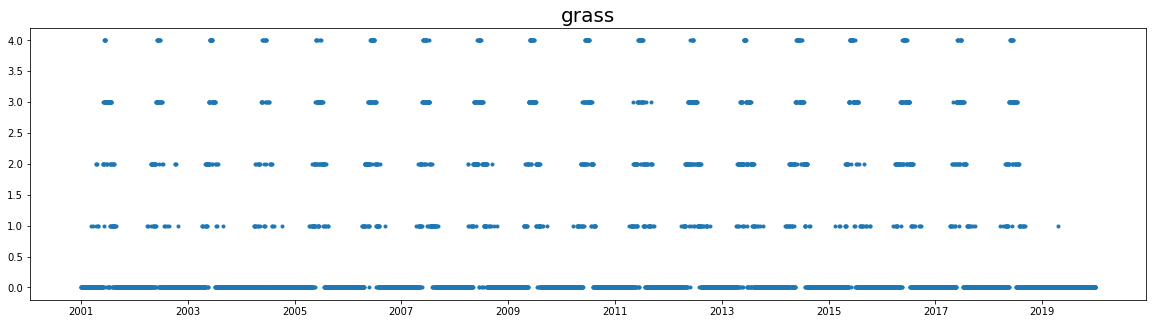

In [66]:
for col in cols:
    plt.figure(figsize=(20, 5))
    plt.plot(df.index, df[col], '.')
    plt.title(col, size=20)
    plt.show()

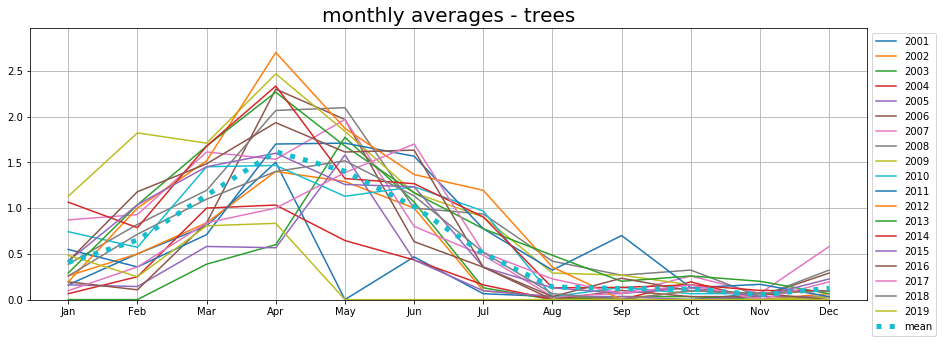

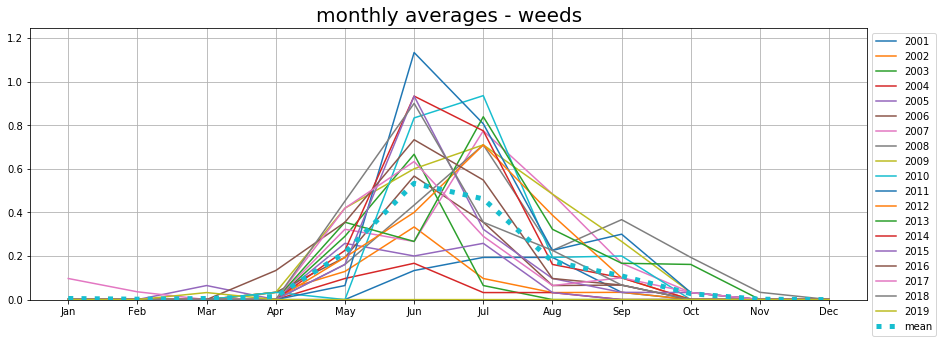

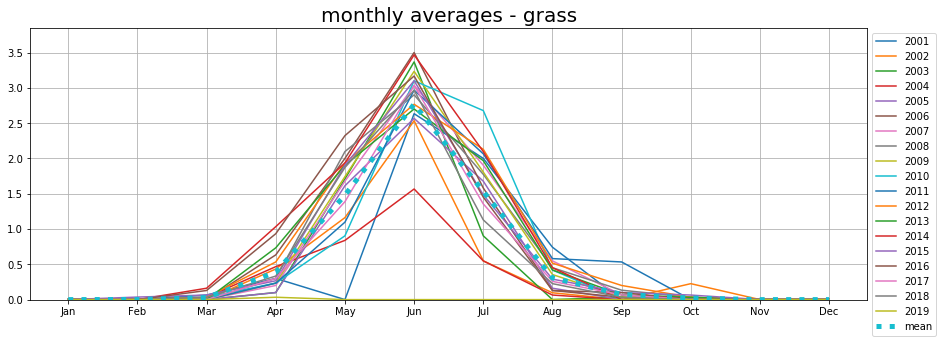

In [67]:
pv = pd.pivot_table(df, index=df.index.month, columns=df.index.year, values=cols, aggfunc='mean')

means = []
for col in cols:
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    pv[col].plot(ax=ax)
    mean = pv[col].mean(axis=1)
    means.append(mean)
    plt.plot(range(1, 13), mean.values, lw=5, ls=':', label='mean')
    plt.title('monthly averages - ' + col, size=20)
    plt.xticks(range(1, 13), months)
    plt.ylim(0, 1.1 * pv[col].values.max())
    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

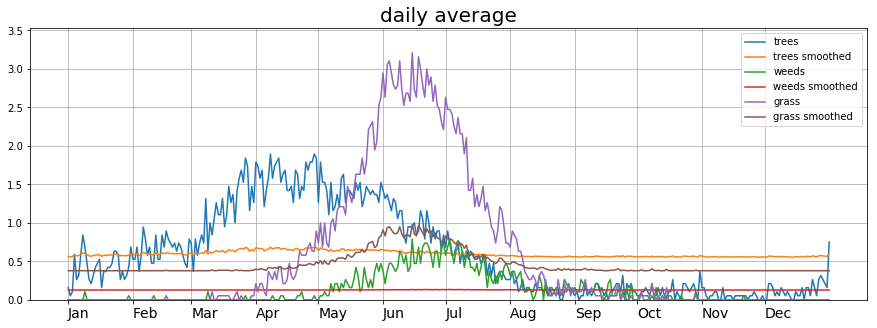

In [134]:
pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year, values=cols, aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
means = []
for col in cols:
    mean = pv[col].mean(axis=1)
    means.append(mean)
    days = pv.index
    plt.plot(days, mean.values, label=col)
    plt.plot(days, gsmooth(mean.values, w=5), label=col + ' smoothed')
plt.title('daily average', size=20)
plt.xticks(monthstartdays, months, ha='left', fontsize=14)
plt.ylim(0, 1.1 * max(mean.values))
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [133]:
def gsmooth(x, w=1):
    sigma = w / (2 * np.sqrt(2 * np.log(2)))
    out = np.zeros_like(x)
    for i in range(out.size):
        g = np.exp(-(x - x[i])**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
        out[i] = np.sum(x * g / g.sum())
    return out